# Masters in Germany research

## Reading the Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('daad_international_master_programs.csv')
df.head()

,Degree Type,Course Title,Institution Name,City Name,Subject,Language,Beginning Semester,Duration,Tuition Fee,Detail Link
0,Master's degree,Actuarial and Financial Mathematics,RPTU University of Kaiserslautern-Landau,Kaiserslautern,Mathematics,English,"Winter semester, Summer semester",4 semesters,none,https://www2.daad.de/deutschland/studienangebo...
1,Master's degree,Advanced and Computational Mathematics – Inter...,Chemnitz University of Technology,Chemnitz,Mathematics,English,"Winter semester, Summer semester",4 semesters,none,https://www2.daad.de/deutschland/studienangebo...
2,Master's degree,Advanced Architecture — From Urban Design to B...,Frankfurt University of Applied Sciences,Frankfurt am Main,Architecture,English,Summer semester,4 semesters,none,https://www2.daad.de/deutschland/studienangebo...
3,Master's degree,Advanced Computational Methods in Civil Engine...,RWTH Aachen University,Aachen,Civil Engineering,English,"Winter semester, Summer semester",4 semesters,none,https://www2.daad.de/deutschland/studienangebo...
4,Master's degree,Advanced Functional Materials,Chemnitz University of Technology,Chemnitz,Chemistry,English,Winter semester,4 semesters,none,https://www2.daad.de/deutschland/studienangebo...


## Visualize the data

In [13]:
# get unique categories into a list
categories = df['Subject'].unique().tolist()

# get the count of courses for each category
category_counts = df['Subject'].value_counts()


# put this in a pandas series
category_series = pd.Series(category_counts, index=categories)

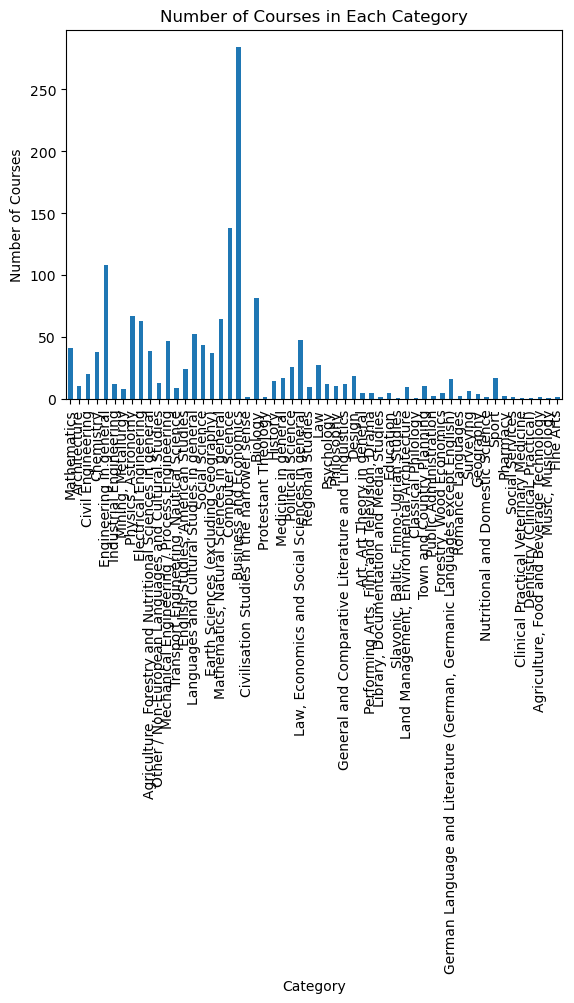

In [14]:
# plot the series as a bar chart
category_series.plot(kind='bar')

# add labels and title
plt.title('Number of Courses in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Courses')

# show the plot
plt.show()

## Cleaning the data a little bit

In [15]:
# get total number of courses
total_courses = df['Course Title'].size

# percentage for which courses below will be grouped into others
percentage_threshold = 5

# calculate number of courses in each category (sorted alphabetically)
distinct_cat_count = df['Subject'].value_counts().sort_index()

# determine which categories are below the limit of others
others_cat = distinct_cat_count[distinct_cat_count / total_courses * 100 <= percentage_threshold].index.tolist()

# combine the categories below the threshold into the others column
df.loc[df['Subject'].isin(others_cat), 'Subject'] = 'Others'


In [16]:
# get unique categories into a list
categories = df['Subject'].unique().tolist()

# get the count of courses for each category
category_counts = df['Subject'].value_counts()

# Create a pandas series with the percentage of courses in each category
category_percentages = category_counts / total_courses * 100

# put this in a pandas series
category_series = pd.Series(category_counts, index=categories)
category_percentages

Others                    59.577279
Business and Economics    18.758256
Computer Science           9.114927
Engineering in general     7.133421
Biology                    5.416116
Name: Subject, dtype: float64

## Plotting the cleaned data

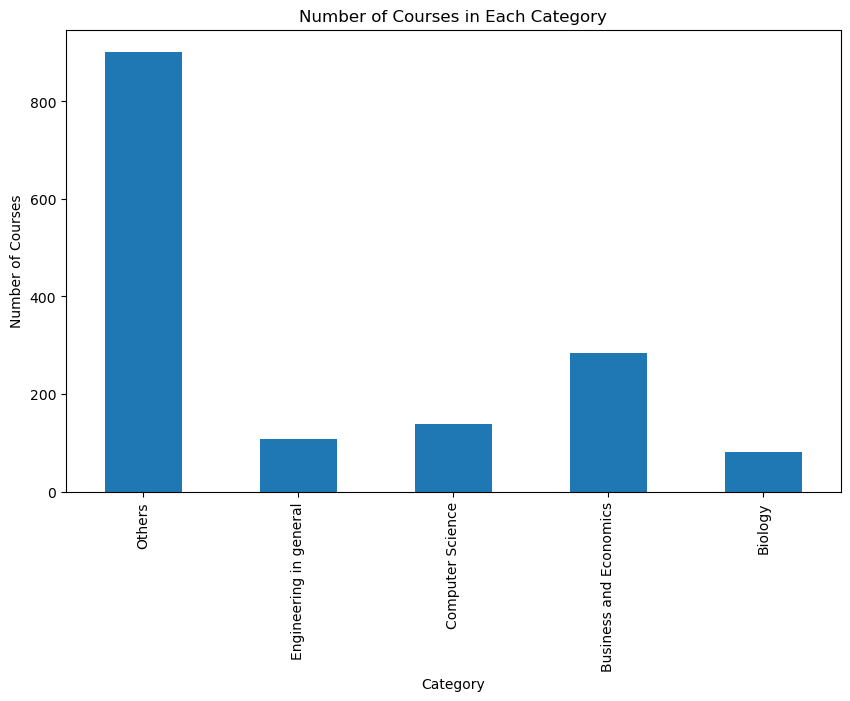

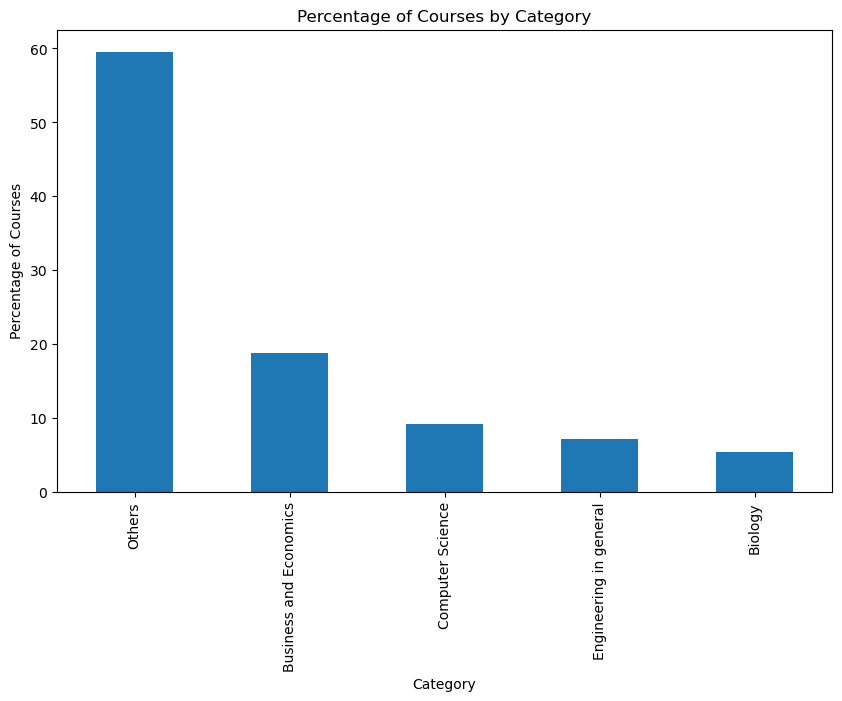

In [17]:
plt.figure(figsize=(10,6))
category_series.plot(kind='bar')
# add labels and title
plt.title('Number of Courses in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Courses')


# Plot the percentages on a bar chart
plt.figure(figsize=(10,6))
category_percentages.plot(kind='bar', title='Percentage of Courses in Each Category')

# add labels and title
plt.title('Percentage of Courses by Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Courses')

# show the plot
plt.show()

## Courses per language

In [18]:
size = df['Course Title'].size
languages = df['Language'].unique().tolist()
languages_counts = df['Language'].value_counts()

language_series = pd.Series(languages_counts, index=languages)
language_series = language_series.sort_values(ascending=False)
language_series

English                             1328
German, English                       99
English, German                       28
German                                24
German, French                        13
English, French                        6
English, Spanish                       5
English, Chinese                       4
English, Other teaching language       3
German, Spanish                        3
German, Italian                        1
Name: Language, dtype: int64

Text(0, 0.5, 'Number of Courses')

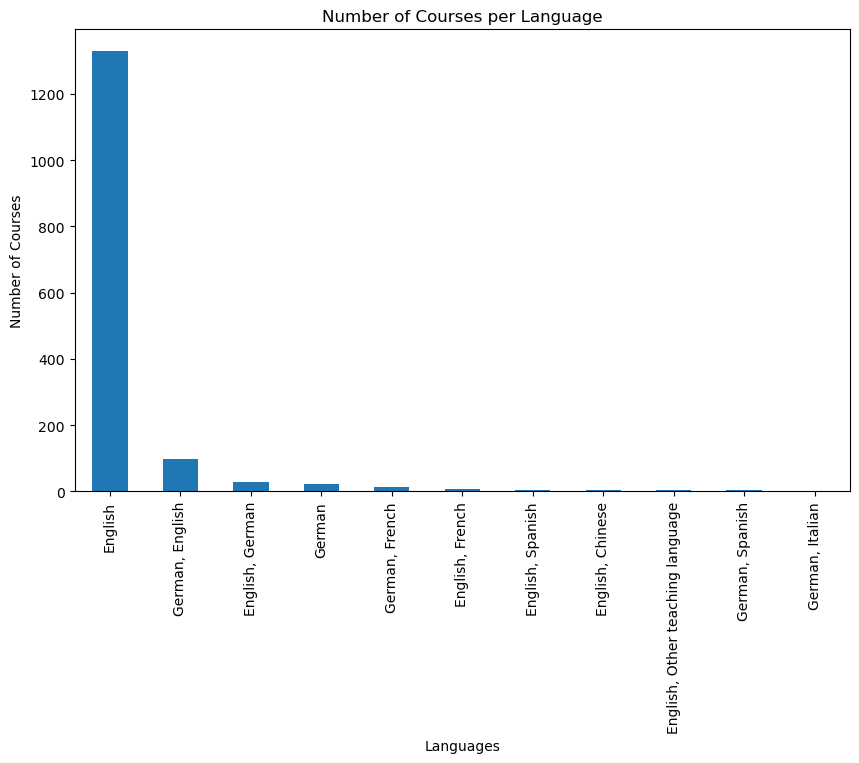

In [20]:
plt.figure(figsize=(10,6))
language_series.plot(kind='bar')
plt.title('Number of Courses per Language')
plt.xlabel('Languages')
plt.ylabel('Number of Courses')

In [25]:
df['Course Count'] = size

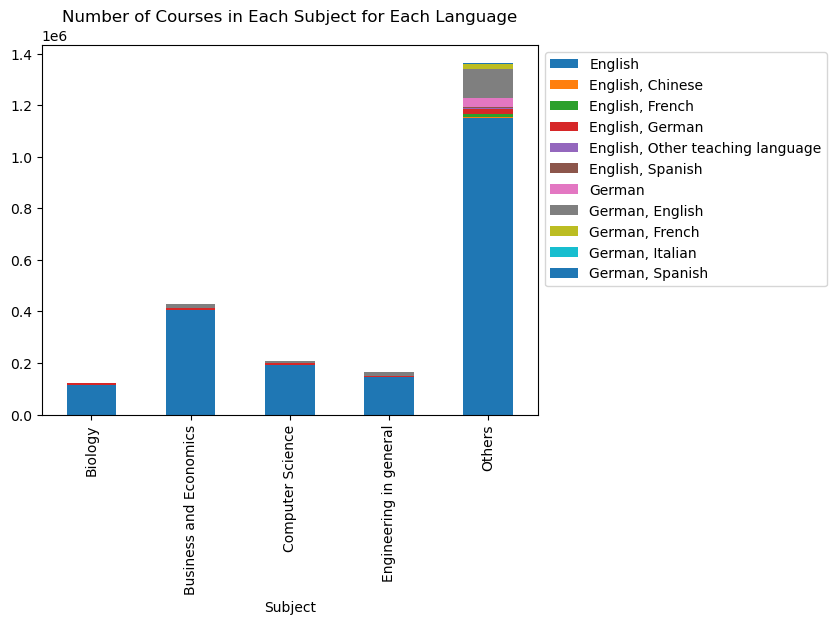

In [33]:
# Create a pivot table with the number of courses in each subject for each language
pivot_table = df.pivot_table(values='Course Count', index='Subject', columns='Language', aggfunc='sum')

# # Calculate the total number of courses in each subject for each language
# pivot_table['total'] = pivot_table.sum(axis=1)

# Plot the results as a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, title='Number of Courses in Each Subject for Each Language')

# Move the legend outside the plot area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()